# MAJOR PROJECT - 1 (COGNITIVE APPLICATION)


## IRIS FLOWER CLASSIFICATION
The dataset given for this project is Iris Dataset. The goal of this project is to classify the flowers into among the three species – virginica,
setosa, or versicolor based on length and width of petals and sepals. Applied two different ML Algorithms - **Logistic Regression, and Decision Tree Classifier** for the same.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Loading and understanding the dataset

In [ ]:
df = pd.read_csv('iris.csv')
df

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [ ]:
# removing the extra 'Unnamed' column 
df = df.drop(columns=df.columns[0])
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# counting the number of samples present in each class
df['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [ ]:
# statistical information about data
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualisation of the dataset with Two attributes(length of sepal and petal) using seaborn

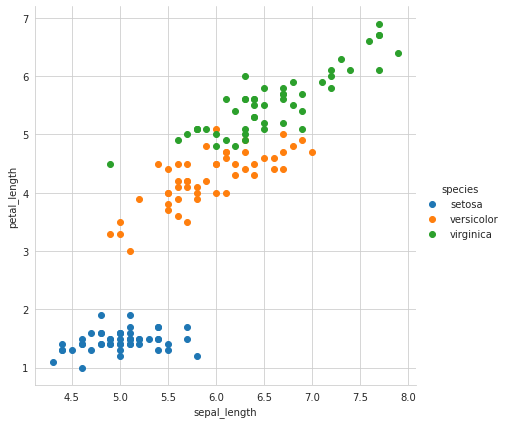

In [ ]:
import seaborn as sns  # importing the seaborn library
 
iris = sns.load_dataset('iris')
sns.set_style("whitegrid")
# sepal_length, petal_length
sns.FacetGrid(iris, hue ="species",
              height = 6).map(plt.scatter,
                              'sepal_length',
                              'petal_length').add_legend()

## Classification using Logistic Regression

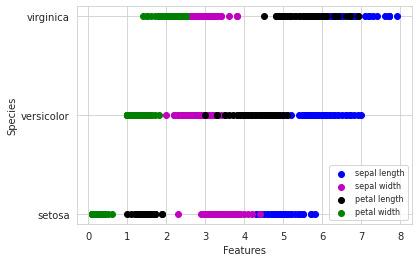

In [ ]:
# plotting each feature against the label values

# Attribute no.1 - Sepal.Length
pltX = df.loc[:, 'Sepal.Length']
pltY = df.loc[:, 'Species']
plt.scatter(pltX, pltY, color = 'b', label = 'sepal length')

# Attribute no.2 - Sepal.Width
pltX = df.loc[:, 'Sepal.Width']
pltY = df.loc[:, 'Species']
plt.scatter(pltX, pltY, color = 'm', label = 'sepal width')

# Attribute no.3 - Sepal.Width
pltX = df.loc[:, 'Petal.Length']
pltY = df.loc[:, 'Species']
plt.scatter(pltX, pltY, color = 'k', label = 'petal length')

# Attribute no.4 - Petal.Width
pltX = df.loc[:, 'Petal.Width']
pltY = df.loc[:, 'Species']
plt.scatter(pltX, pltY, color = 'g', label = 'petal width')

plt.xlabel('Features')
plt.ylabel('Species')
plt.legend(loc = 4, prop={'size':8})
plt.show()

In [ ]:
# feature values
X = df.iloc[:, :4]
X.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Target values
# We have to do Label Encoding since the target values(Species) are strings instead of numbers
# Here, I'm using Label Encoder to do the same

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['Species'])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
le.inverse_transform([0, 1, 2])  # we can get the string target values using inverse transform

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
# Spiliting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state = 2)
print(y_test)  # printing y_test

[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 1 1 2 1 1 0 0 2 0 2]


In [ ]:
# Fitting the model using Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(x_test)  # predicted values are in numbers
predictions = le.inverse_transform(y_pred)
predictions  # predicted output labels

array(['setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica'], dtype=object)

In [ ]:
y_true = le.inverse_transform(y_test)  # actual output labels as strings
y_true

array(['setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'setosa', 'virginica'], dtype=object)

In [ ]:
# Accuracy classification score
from sklearn.metrics import accuracy_score as AS
score_lr = AS(y_test, y_pred)
print('Accuracy classification score: ',score_lr)

Accuracy classification score:  0.9666666666666667


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]


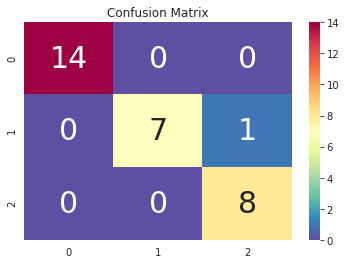

In [ ]:
# Plotting confusion matrix
import seaborn as sns  # confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Spectral_r", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

### Classification using DecisionTree Classifier

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz       # export_graphviz converts decision tree classifier into dot file

In [ ]:
iris = load_iris()
x=iris.data
y=iris.target
print(y) # target / output data

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print(x) # input data

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
# Fitting the model using Decision Tree Classifier
classifier = DecisionTreeClassifier()
model=classifier.fit(x, y)

In [ ]:
# String representation of the input tree as a dot file using export_graphviz
data = export_graphviz(classifier, out_file=None, feature_names = iris.feature_names, class_names = iris.target_names, filled = True, rounded = True, special_characters = True)


In [ ]:
# Creating a visual graph from the dot file generated in the previous code.
graph = graphviz.Source(data)
graph.render("iris")

'iris.pdf'

In [ ]:
# To display pdf file (output of the previous code) in the google colab
import subprocess
subprocess.Popen(['iris.pdf'],shell=True)

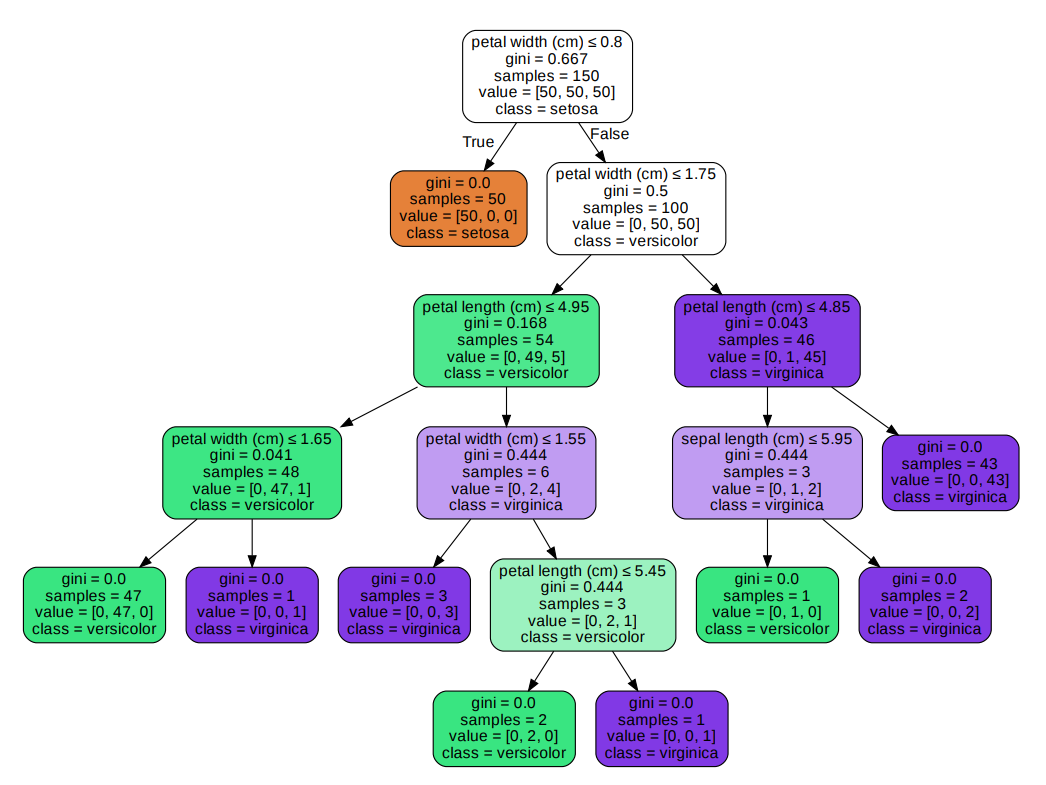

In [ ]:
# Prediction of a new input data 
prediction = classifier.predict_proba([[5.95,3.9,4.8,1.7]])   # Example of a virginica class.
print(prediction)

[[0. 0. 1.]]


In [ ]:
#Accuracy Score
score = classifier.score(x, y)
print(score)

1.0


## Comparision of the accuracy of different algorithms

In [ ]:
# Accuracy of Decision Tree Classifier Algorithm
print("Decision Tree Classifier : {}".format(score))

Decision Tree Classifier : 1.0


In [ ]:
# Accuracy of Logistic Regression Algorithm
print('Accuracy score for Logistic regression: ',score_lr)

Accuracy score for Logistic regression:  0.9666666666666667
